In [32]:
import glob
import shutil
import os.path as op

In [2]:
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001

mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001: File exists


In [3]:
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/

mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/: File exists


In [4]:
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/func
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/anat
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/fmap


!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/func
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/anat
!mkdir $HOME/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/fmap

mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/func: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/anat: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-sns3t/fmap: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/func: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/anat: File exists
mkdir: /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-ibt7t/fmap: File exists


In [8]:
new_sourcedata = sourcedata = '/Users/gdehol/Science/balgrist/data/ds-balgrist'

In [ ]:
for subdir in ['fmap', 'func', 'anat']:
    for fn in glob.glob(op.join('/data/ds-risk/sub-29/ses-3t1', subdir, '*')):
        fn_ = op.split(fn)[1]
        shutil.copy(fn, op.join(new_sourcedata, 'sub-001', 'ses-sns3t', subdir, fn_.replace('sub-29', 'sub-001').replace('ses-3t1', 'ses-sns3t')))

In [52]:
for subdir in ['fmap', 'func', 'anat']:
    for fn in glob.glob(op.join('/data/ds-risk/sub-29/ses-7t1', subdir, '*')):
        fn_ = op.split(fn)[1]
        shutil.copy(fn, op.join(new_sourcedata, 'sub-001', 'ses-ibt7t', subdir, fn_.replace('sub-29', 'sub-001').replace('ses-7t1', 'ses-ibt7t')))

In [ ]:
for subdir in ['fmap', 'func', 'anat']:
    for fn in glob.glob(op.join(new_sourcedata, 'sub-001', 'ses-balgrist7t', subdir, '*')):
        fn_ = op.split(fn)[1]
        shutil.move(fn, fn.replace('sub-test', 'sub-001'))

In [3]:
import nipype

In [4]:
from nilearn import image

In [23]:
import json

In [56]:
# Got a bit of a mess
encodings = ['i', 'i', 'i', 'i-', 'i-']

for source_run, target_run in zip([3, 3, 4, 4, 4], [4, 5, 1, 2, 3]):
    print(source_run, target_run)
    bold = op.join(sourcedata, 'sub-001', 'ses-balgrist7t', 'func', f'sub-001_ses-balgrist7t_task-mapper_run-{source_run}_bold.nii')
    json_d = op.join(sourcedata, 'sub-001', 'ses-balgrist7t', 'func', f'sub-001_ses-balgrist7t_task-mapper_run-{source_run}_bold.json')
    bold = image.load_img(bold)
    
    with open(json_d) as handle:
        json_d = json.load(handle)
        
    json_d['IntendedFor'] = f'ses-balgrist7t/func/sub-001_ses-balgrist7t_task-mapper_run-{target_run}_bold.nii'
    
    
    json_d['PhaseEncodingDirection'] = encodings[source_run-1]
    
    if source_run > target_run:
        topup = image.index_img(bold, range(10))
    else:
        topup = image.index_img(bold, range(-10, -1))
    
    topup.to_filename(op.join(sourcedata, 'sub-001', 'ses-balgrist7t', 'fmap', f'sub-001_ses-balgrist7t_run-{target_run}_epi.nii'))
    
    
    with open(op.join(sourcedata, 'sub-001', 'ses-balgrist7t', 'fmap', f'sub-001_ses-balgrist7t_run-{target_run}_epi.json'), 'w') as handle:
        json.dump(json_d, handle)

3 4
3 5
4 1
4 2
4 3


In [35]:
import json

In [53]:
for fn in glob.glob(op.join(sourcedata, 'sub-001', 'ses-balgrist7t', 'func', '*.json')):
    
    with open(fn, 'r') as handle:
        metadata = json.load(handle)
        metadata['TaskName'] = 'Numerosity Mapper'
        metadata['task'] = 'mapper'
        
    with open(fn, 'w') as handle:
        json.dump(metadata, handle, indent=4)

In [54]:
for fn in glob.glob(op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'func', '*.json')):
    
    with open(fn, 'r') as handle:
        metadata = json.load(handle)
        metadata['TaskName'] = 'Numerosity Mapper'
        metadata['task'] = 'mapper'
        
    with open(fn, 'w') as handle:
        json.dump(metadata, handle, indent=4)

In [61]:
# for fn in glob.glob(op.join(sourcedata, 'sub-001', 'ses-ibt7t', 'fmap', '*.json')):
    
#     with open(fn, 'r') as handle:
#         metadata = json.load(handle)

#         metadata['IntendedFor'] = metadata['IntendedFor'].replace('sub-29', 'sub-001')
#         metadata['IntendedFor'] += '.gz'
#         print(metadata)
# #         metadata['task'] = 'mapper'
        
#     with open(fn, 'w') as handle:
#         json.dump(metadata, handle, indent=4)

{'TotalReadoutTime': 0.04, 'PhaseEncodingDirection': 'i', 'IntendedFor': 'ses-ibt7t/func/sub-001_ses-ibt7t_task-mapper_run-4_bold.nii.gz'}
{'TotalReadoutTime': 0.04, 'PhaseEncodingDirection': 'i', 'IntendedFor': 'ses-ibt7t/func/sub-001_ses-ibt7t_task-mapper_run-2_bold.nii.gz'}
{'TotalReadoutTime': 0.04, 'PhaseEncodingDirection': 'i-', 'IntendedFor': 'ses-ibt7t/func/sub-001_ses-ibt7t_task-mapper_run-3_bold.nii.gz'}
{'TotalReadoutTime': 0.04, 'PhaseEncodingDirection': 'i-', 'IntendedFor': 'ses-ibt7t/func/sub-001_ses-ibt7t_task-mapper_run-1_bold.nii.gz'}


In [65]:
im

NameError: name 'im' is not defined

In [67]:
im = image.load_img(fn)

In [74]:
for fn in glob.glob(op.join(sourcedata, 'sub-001', 'ses-ibt7t', 'func', '*.nii.gz')):
    
    im = image.load_img(fn)
    zooms = list(im.header.get_zooms())
    
    zooms[-1] = 2.3
    im.header.set_zooms(zooms)
    
    im.to_filename(fn)
    
    
#     with open(fn, 'r') as handle:
#         metadata = json.load(handle)

#         metadata['IntendedFor'] = metadata['IntendedFor'].replace('sub-29', 'sub-001')
#         metadata['IntendedFor'] += '.gz'
#         print(metadata)
# #         metadata['task'] = 'mapper'
        
#     with open(fn, 'w') as handle:
#         json.dump(metadata, handle, indent=4)

In [77]:
with open(op.join(sourcedata, 'sub-001', 'ses-sns3t', 'func', 'sub-001_ses-sns3t_task-mapper_run-4_bold.json')) as handle:
    slice_timing = json.load(handle)['SliceTiming']
    
    
for fn in glob.glob(op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'func', '*.json')):
    
    with open(fn) as handle:        
        d = json.load(handle)
        
    d['SliceTiming'] = slice_timing
    
    with open(fn, 'w') as handle:        
        json.dump(d, handle) 

In [5]:
import nipype.pipeline.engine as pe
import nipype.interfaces.utility as niu
from nipype.interfaces import ants, afni, fsl
from nipype.interfaces import io as nio

In [6]:
from niworkflows.interfaces.bids import DerivativesDataSink

In [79]:
# Got a bit of a mess
encodings = ['i', 'i-', 'i', 'i-']

for source_run, target_run in zip([2, 3, 4, 3], [1, 2, 3, 4]):
    print(source_run, target_run)
    bold = op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'func', f'sub-001_ses-balgrist3t_task-mapper_run-{source_run}_bold.nii')
    json_d = op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'func', f'sub-001_ses-balgrist3t_task-mapper_run-{source_run}_bold.json')
    bold = image.load_img(bold)
    
    with open(json_d) as handle:
        json_d = json.load(handle)
        
    json_d['IntendedFor'] = f'ses-balgrist3t/func/sub-001_ses-balgrist3t_task-mapper_run-{target_run}_bold.nii'
    

    json_d['PhaseEncodingDirection'] = encodings[source_run-1]
    
    if source_run > target_run:
        topup = image.index_img(bold, range(10))
    else:
        topup = image.index_img(bold, range(-10, -1))
    
    topup.to_filename(op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'fmap', f'sub-001_ses-balgrist3t_run-{target_run}_epi.nii'))
    
    
    with open(op.join(sourcedata, 'sub-001', 'ses-balgrist3t', 'fmap', f'sub-001_ses-balgrist3t_run-{target_run}_epi.json'), 'w') as handle:
        json.dump(json_d, handle)

2 1
3 2
4 3
3 4


In [19]:
bet.outputs


inskull_mask_file = <undefined>
inskull_mesh_file = <undefined>
mask_file = <undefined>
meshfile = <undefined>
out_file = <undefined>
outline_file = <undefined>
outskin_mask_file = <undefined>
outskin_mesh_file = <undefined>
outskull_mask_file = <undefined>
outskull_mesh_file = <undefined>
skull_file = <undefined>
skull_mask_file = <undefined>

210719-10:35:50,719 nipype.workflow INFO:
	 Workflow fix_mp2rage settings: ['check', 'execution', 'logging', 'monitoring']
210719-10:35:50,726 nipype.workflow INFO:
	 Running serially.
210719-10:35:50,727 nipype.workflow INFO:
	 [Node] Setting-up "fix_mp2rage.n4_bias" in "/private/tmp/fix_mp2rage/n4_bias".
210719-10:35:50,731 nipype.workflow INFO:
	 [Node] Cached "fix_mp2rage.n4_bias" - collecting precomputed outputs
210719-10:35:50,731 nipype.workflow INFO:
	 [Node] "fix_mp2rage.n4_bias" found cached.
210719-10:35:50,732 nipype.workflow INFO:
	 [Node] Setting-up "fix_mp2rage.bet" in "/private/tmp/fix_mp2rage/bet".
210719-10:35:50,736 nipype.workflow INFO:
	 [Node] Cached "fix_mp2rage.bet" - collecting precomputed outputs
210719-10:35:50,737 nipype.workflow INFO:
	 [Node] "fix_mp2rage.bet" found cached.
210719-10:35:50,737 nipype.workflow INFO:
	 [Node] Setting-up "fix_mp2rage.automasker" in "/private/tmp/fix_mp2rage/automasker".
210719-10:35:50,741 nipype.workflow INFO:
	 [Node] Cache

/Users/gdehol/miniconda3/lib/python3.8/site-packages/bids/layout/models.py:148: FutureWarning: The 'extension' entity currently excludes the leading dot ('.'). As of version 0.14.0, it will include the leading dot. To suppress this warning and include the leading dot, use `bids.config.set_option('extension_initial_dot', True)`.
  warnings.warn("The 'extension' entity currently excludes the leading dot ('.'). "


In [31]:
!cat /private/tmp/fix_mp2rage/datasink/_report/report.rst

Node: datasink (bids)


 Hierarchy : fix_mp2rage.datasink
 Exec ID : datasink


Original Inputs
---------------


* acquisition : <undefined>
* atlas : <undefined>
* base_directory : /Users/gdehol/Science/balgrist/data/ds-balgrist
* ceagent : <undefined>
* check_hdr : True
* cohort : <undefined>
* compress : <undefined>
* data_dtype : <undefined>
* datatype : <undefined>
* density : <undefined>
* desc : <undefined>
* direction : <undefined>
* dismiss_entities : <undefined>
* echo : <undefined>
* extension : <undefined>
* fmap : <undefined>
* fmapid : <undefined>
* from : <undefined>
* hemi : <undefined>
* in_file : ['/private/tmp/fix_mp2rage/apply_mask/sub-001_ses-balgrist7t_T1UNI_masked.nii.gz']
* label : <undefined>
* meta_dict : <undefined>
* modality : <undefined>
* mode : <undefined>
* model : <undefined>
* proc : <undefined>
* reconstruction : <undefined>
* recording : <undefined>
* resolution : <undefined>
* roi : <undefined>
* run : <undefined>
* scans : <undefined>
* session :

In [12]:
automask.outputs


brain_file = <undefined>
out_file = <undefined>

In [21]:
masker.outputs


brain_file = <undefined>
out_file = <undefined>

In [13]:
masker.inputs


args = <undefined>
brain_file = <undefined>
clfrac = <undefined>
dilate = <undefined>
environ = {}
erode = <undefined>
in_file = <undefined>
num_threads = 1
out_file = <undefined>
outputtype = AFNI

In [7]:
from nilearn import plotting

In [ ]:
thr_img = image.threshold_img(img, "60%")

In [9]:
from nilearn import masking

In [10]:
import seaborn as sns

In [78]:
thr_img = masking.compute_epi_mask(img, lower_cutoff=0.05, upper_cutoff=0.25)

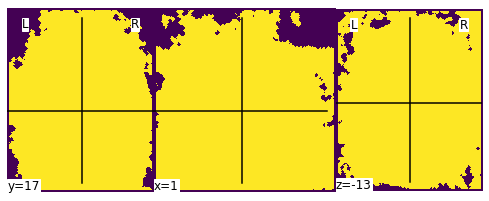

In [79]:
plotting.plot_img(image.math_img('im!=0', im=thr_img))

In [56]:
wf.run()

210713-15:32:22,950 nipype.workflow INFO:
	 Workflow fix_mp2rage settings: ['check', 'execution', 'logging', 'monitoring']
210713-15:32:22,956 nipype.workflow INFO:
	 Running serially.
210713-15:32:22,957 nipype.workflow INFO:
	 [Node] Setting-up "fix_mp2rage.n4_bias" in "/private/tmp/fix_mp2rage/n4_bias".
210713-15:32:22,963 nipype.workflow INFO:
	 [Node] Running "n4_bias" ("nipype.interfaces.ants.segmentation.N4BiasFieldCorrection"), a CommandLine Interface with command:
N4BiasFieldCorrection -d 3 --input-image /Users/gdehol/Science/balgrist/data/ds-balgrist/sub-001/ses-balgrist7t/anat/sub-001_ses-balgrist7t_inv-2_MP2RAGE.nii --output sub-001_ses-balgrist7t_inv-2_MP2RAGE_corrected.nii
210713-15:33:09,624 nipype.workflow INFO:
	 [Node] Finished "fix_mp2rage.n4_bias".


In [50]:
biasfield_correction.outputs


bias_image = <undefined>
output_image = <undefined>